<a href="https://colab.research.google.com/github/SakshiKasture/MNIST_digit_classification/blob/main/MNIST_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

In [ ]:
#Load the dataset
'''Normalization (x_train / 255.0 and x_test / 255.0):
Pixel values in the MNIST dataset range from 0 to 255.
Dividing by 255 scales these values to the range [0, 1], which helps the model converge faster during training by keeping input values small and consistent.'''
'''Reshaping (x_train.reshape and x_test.reshape):
The MNIST images are initially 2D arrays of shape (28, 28) (height and width).
Neural networks, especially in Keras, expect an additional dimension for channels (e.g., grayscale images have 1 channel).
Reshaping to (28, 28, 1) adds this channel dimension, making the data compatible with Keras layers.'''
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train /255.0, x_test /255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Defining the model, using Sequential here Use Sequential for simple, stackable layers.
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Train model
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8800 - loss: 0.4290
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9637 - loss: 0.1198
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9768 - loss: 0.0792
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9826 - loss: 0.0577
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9866 - loss: 0.0455


In [ ]:
#Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9742 - loss: 0.0847
Test accuracy: 0.98


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


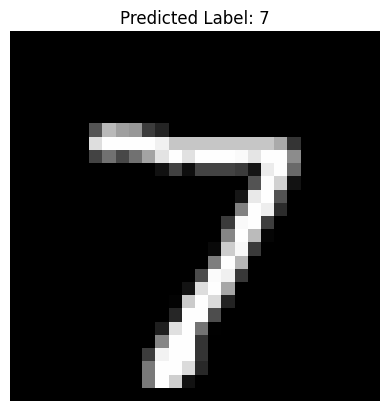

In [ ]:
#Predict and Visualize
#np.argmax(): It finds the index (class) with the highest predicted probability.
#Since this is a classification problem, the index corresponds to the predicted label (e.g., 0-9 for digits).
#model.predict(x_test[0:1]): This makes the model predict the class for the first image in the test set.
predicted_class = np.argmax(model.predict(x_test[0:1]))
#x_test[0].reshape(28, 28) reshapes the first image in the test set (x_test[0]) back into its original 28x28 pixel format.
#x_test[0] gives the first image, which is a flattened array of 28x28x1 pixels (due to earlier reshaping).
#.reshape(28, 28) converts this flattened image back into a 2D array (28x28), so it can be displayed properly as an image.
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_class}")
plt.axis('off')
plt.show()